<a href="https://colab.research.google.com/github/ANUSHKA-BARBAILE/K-Nearest-Neighbour-Algorithm-Using-Credit-Card-Defaulter-Prediction-dataset/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/sample_data/Credit Card Defaulter Prediction.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

In [ ]:
X = df[['PAY_0', 'PAY_2', 'PAY_3','PAY_4','PAY_5']]
y = df['PAY_6']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
Scaler = StandardScaler()
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25)
X_train.shape
y_test.shape
Scaler.fit(X_train)
Scaler.mean_




array([-0.01688889, -0.13702222, -0.16857778, -0.22653333, -0.26782222])

In [ ]:
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)
X_train




/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.02841904,  0.21021543,  0.25910113,  0.36060959,  0.44616344],
       [-0.76406937, -0.48822651, -0.44110086, -0.37409965, -0.33557234],
       [ 0.02841904,  0.21021543,  0.25910113,  0.36060959,  0.44616344],
       ...,
       [ 0.82090746,  1.6070993 ,  1.65950513,  0.36060959,  0.44616344],
       [-1.55655779, -1.18666845, -1.14130286, -1.10880889, -1.11730813],
       [ 0.02841904,  0.21021543,  0.25910113,  0.36060959,  0.44616344]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)



0.8217333333333333

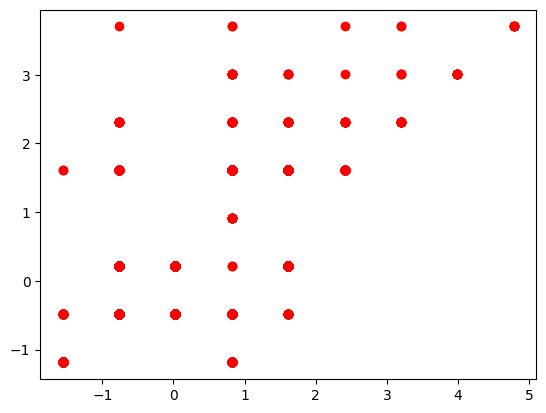

In [ ]:
X_train_0 = X_train[y_train==0]
X_train_1 = X_train[y_train==1]
plt.scatter(X_train_0[:,0],X_train_0[:,1],c='red')
plt.scatter(X_train_1[:,0],X_train_1[:,1],c='blue')





In [ ]:
y_pred = knn.predict(X_test)
X_test_0_act = X_test[y_test==0]
X_test_1_act = X_test[y_test==1]
X_test_0_pre = X_test[y_pred==0]
X_test_1_pre = X_test[y_pred==1]



In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-2,-1,0,2,3,4,7,All
True,,,,,,,,
-2,1027,105,78,9,0,0,0,1219
-1,114,1045,269,18,0,0,0,1446
0,4,278,3673,99,0,0,0,4054
2,1,44,270,383,4,2,0,704
3,0,3,6,21,16,2,0,48
4,0,0,1,3,0,7,0,11
5,0,0,0,1,0,0,0,1
6,0,0,2,0,1,0,2,5
7,0,0,0,0,0,0,12,12


Text(33.22222222222222, 0.5, 'Truth')

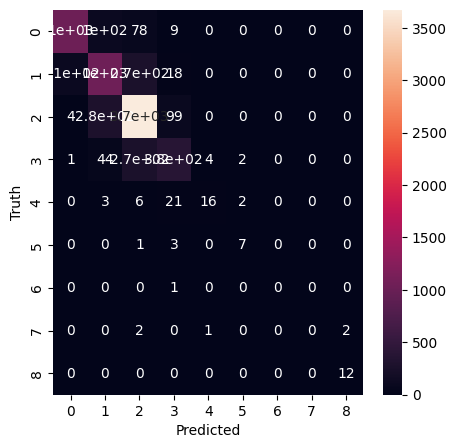

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cm_matrix = metrics.confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

          -2       0.90      0.84      0.87      1219
          -1       0.71      0.72      0.72      1446
           0       0.85      0.91      0.88      4054
           2       0.72      0.54      0.62       704
           3       0.76      0.33      0.46        48
           4       0.64      0.64      0.64        11
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       0.86      1.00      0.92        12

    accuracy                           0.82      7500
   macro avg       0.60      0.55      0.57      7500
weighted avg       0.82      0.82      0.82      7500



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
